## **Extract frames from video file**
This code extracts frames (.jpg) from movie files (.mp4) at a defined framerate.<br>
It assumes that each video file is stored in separate subdirectory, and it visualizes a random frame at the end.<br>
It assumes following folder structure: root/Scene1/.mp4, root/Scene2/.mp4 etc.<br>



## Import libraries and define settings

In [1]:
# import libraries 
import cv2
import os.path as op
import glob
import math
import matplotlib.pyplot as plt

# path to data
path2data = glob.glob('/System/Volumes/Data/misc/data61/code_review/' + 'Scene*') 

# desired frame rate for exporting
new_frame_rate = 5

## Loop over movie files and extract frames

In [2]:
# loop over folders in root directory
for f in path2data:

    # find movie file inside folder
    cFile = glob.glob(f + '/*.mp4')
    print('Working on file: {}'.format(cFile))

    # load video & check frame rate
    vidcap = cv2.VideoCapture(cFile[0])
    success,image = vidcap.read()
    fps = vidcap.get(cv2.CAP_PROP_FPS)
    fr_add = fps/new_frame_rate

    # print some video diagnostics
    print(' - input frame rate: {}, export frame rate: {}'.format(round(fps, 2), new_frame_rate))
    print(' - input frame count: {}, export frame count {}'.format(round(vidcap.get(cv2.CAP_PROP_FRAME_COUNT)), math.ceil(vidcap.get(cv2.CAP_PROP_FRAME_COUNT)/fr_add)))

    # extract frames
    count = 1
    while success:
        vidcap.set(cv2.CAP_PROP_POS_FRAMES,(count))
        export_file_name = f + '/frame_' + str(round(count)) + '.jpg'
        cv2.imwrite(export_file_name, image)
        success,image = vidcap.read()
        count += fr_add

    # sanity check: how many frames were written?
    written_files = glob.glob(op.join(f, '*.jpg'))
    print(' - n files written: {}'.format(len(written_files)))
print('Done!')

Working on file: ['/System/Volumes/Data/misc/data61/code_review/Scene_3/Sherlock_ET_scene3.mp4']
 - input frame rate: 29.97, export frame rate: 5
 - input frame count: 1349, export frame count 226
 - n files written: 226
Working on file: ['/System/Volumes/Data/misc/data61/code_review/Scene_2/Sherlock_ET_scene2.mp4']
 - input frame rate: 29.97, export frame rate: 5
 - input frame count: 894, export frame count 150
 - n files written: 150
Done!


## Visualization

Text(0.5, 1.0, 'random frame')

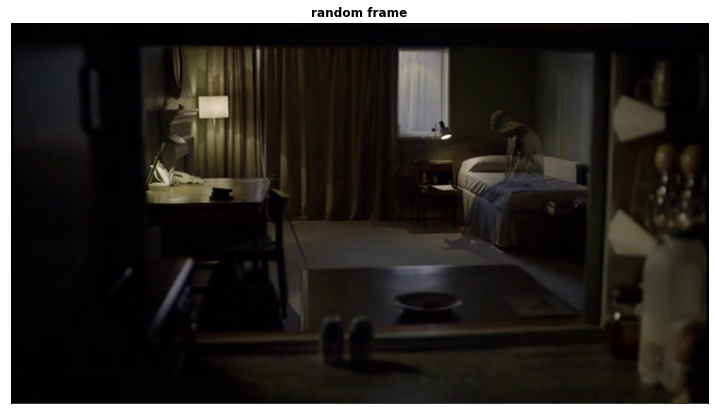

In [4]:
# Find files 
images = glob.glob(path2data[0] + '/*.jpg')

# open figure
fig = plt.figure(figsize=(12.5,7))
fig.patch.set_facecolor('xkcd:white')

# plot a frame
im = plt.imshow(plt.imread(images[8]), alpha=1, aspect='auto')
h = plt.gca()
h.axes.get_xaxis().set_ticks([])
h.axes.get_yaxis().set_ticks([])
h.set_title('random frame', color='black', fontweight="bold")